In [1]:
import sys
sys.path.append('../..')

In [2]:
import sbi4abm.sbi
from sbi4abm.sbi import analysis, utils
from sbi4abm.utils import sampling, plotting
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import torch
import pickle
import seaborn as sns
from torch.nn import functional as F

/home/pmms2/sbi4abm/py_env/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
matplotlib.rc('text', usetex=True)
plt.rcParams.update({
  "text.usetex": False,
  "font.family": "serif"
})
plt.rcParams.update({
    'text.latex.preamble':r"\usepackage{amsmath}"+"\n"+r"\usepackage{bm}"
})

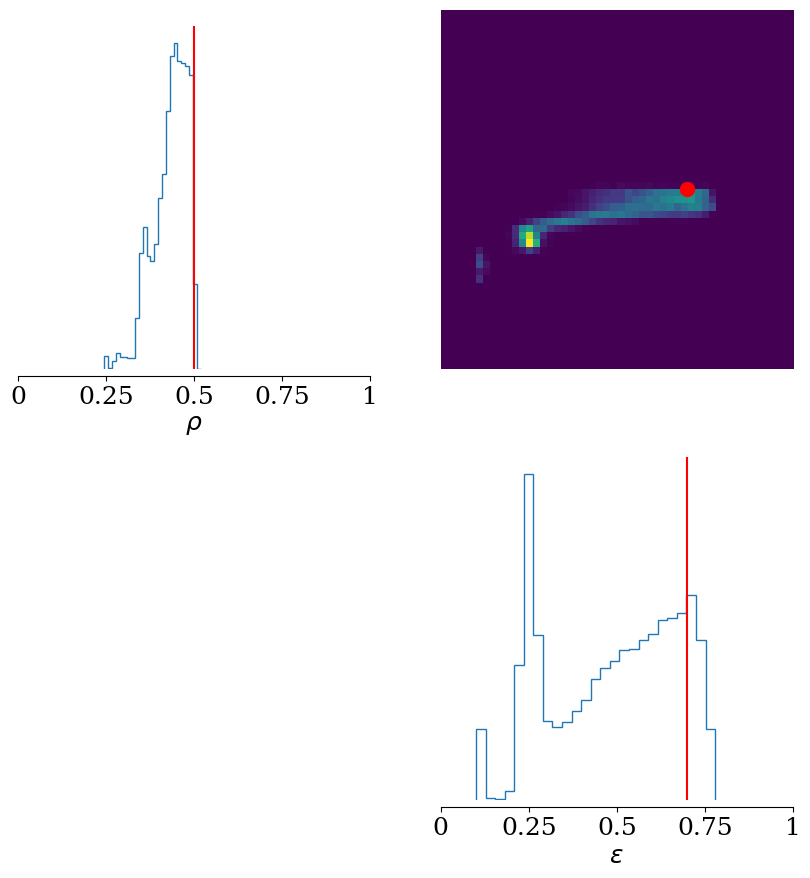

In [4]:
# resnet
segregation = np.loadtxt("../../exp_dir/segregation/resnet_100000/samples.txt")
plt.rcParams.update({'font.size':18}) # something about latex font
_ = analysis.pairplot(segregation, limits=[[0,1], [0, 1]], points=[np.array([0.5, 0.7])],
                      points_colors='r', labels=[r"$\rho$", r"$\epsilon$", r"$\lambda$", r"$\alpha$"],
                      hist_diag={"alpha": 1.0, "bins": 25, "density": False, "histtype": "step"})


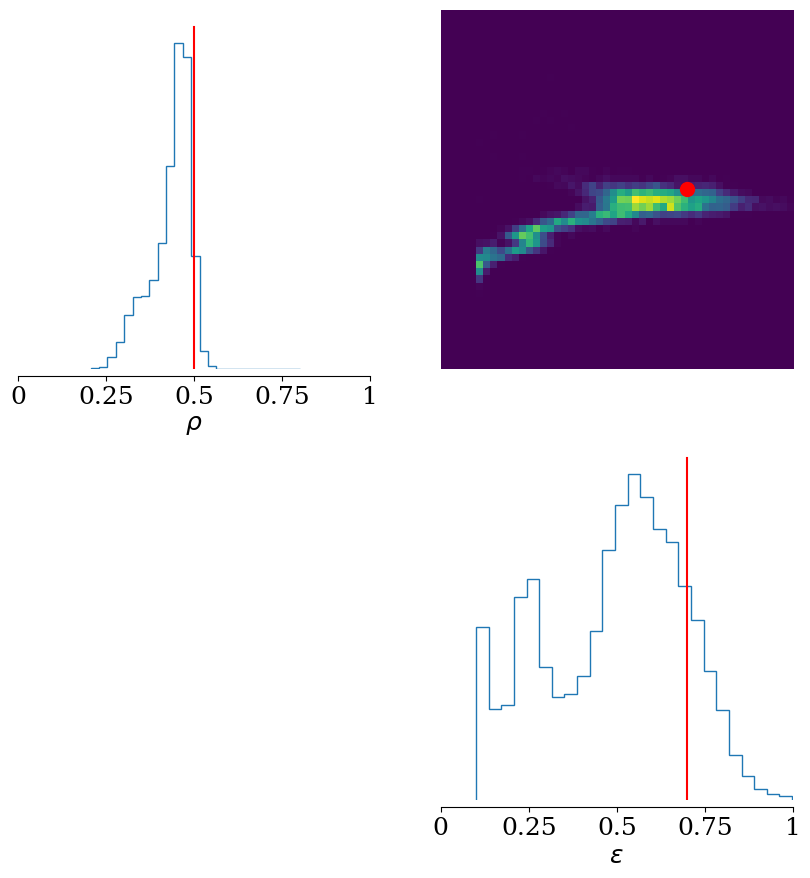

In [5]:
# maf
segregation = np.loadtxt("../../exp_dir/segregation/maf_100000/samples.txt")
plt.rcParams.update({'font.size':18}) # something about latex font
_ = analysis.pairplot(segregation, limits=[[0,1], [0, 1]], points=[np.array([0.5, 0.7])],
                      points_colors='r', labels=[r"$\rho$", r"$\epsilon$", r"$\lambda$", r"$\alpha$"],
                      hist_diag={"alpha": 1.0, "bins": 25, "density": False, "histtype": "step"})


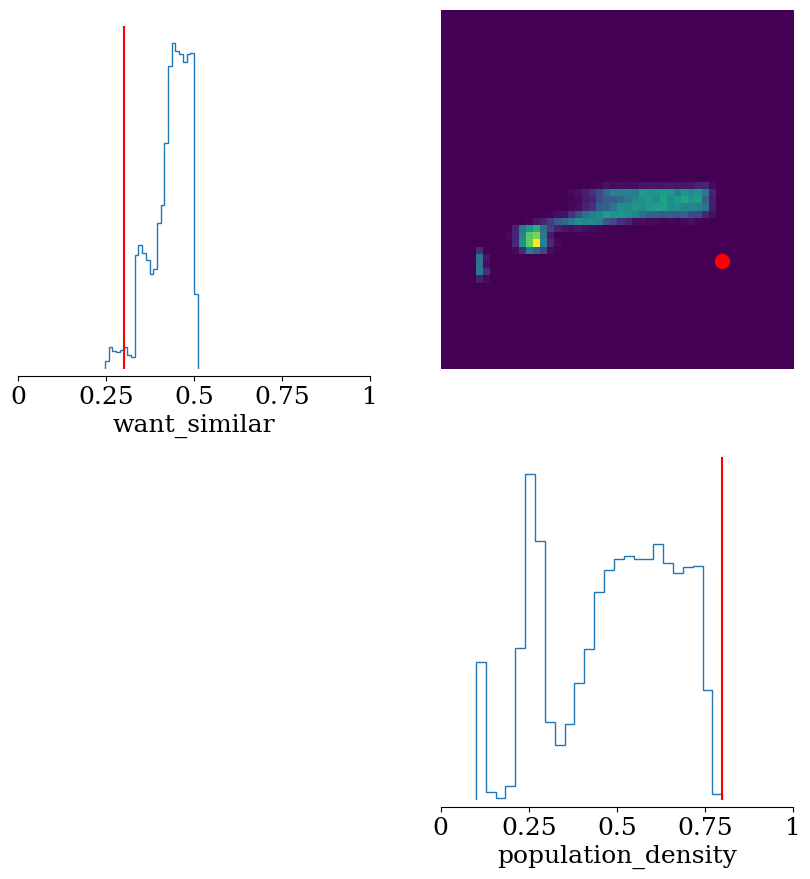

In [29]:
# resnet -> new architecture
segregation = np.loadtxt("../../exp_dir/segregation/1714740228.3274262/samples.txt")
plt.rcParams.update({'font.size':18}) # something about latex font
_ = analysis.pairplot(segregation, limits=[[0,1], [0, 1]], points=[np.array([0.3, 0.8])],
                      points_colors='r', labels=[r"want_similar", r"population_density"],
                      hist_diag={"alpha": 1.0, "bins": 25, "density": False, "histtype": "step"})


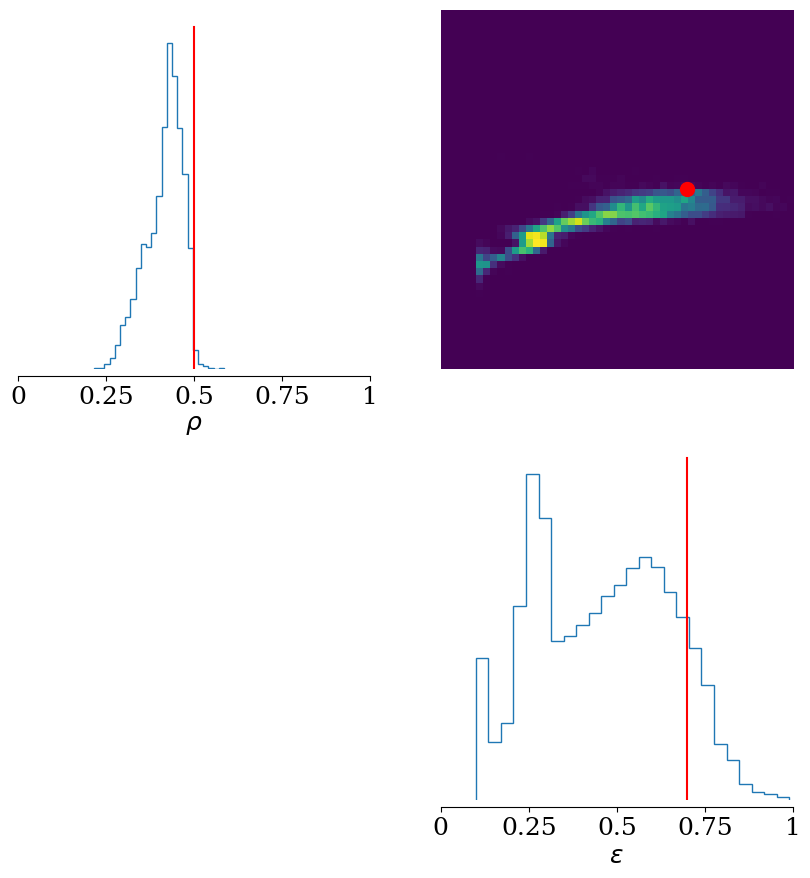

In [5]:
# maf -> new arch final
segregation = np.loadtxt("../../exp_dir/segregation/1716030477.2453024/samples.txt")
plt.rcParams.update({'font.size':18}) # something about latex font
_ = analysis.pairplot(segregation, limits=[[0,1], [0, 1]], points=[np.array([0.5, 0.7])],
                      points_colors='r', labels=[r"$\rho$", r"$\epsilon$", r"$\lambda$", r"$\alpha$"],
                      hist_diag={"alpha": 1.0, "bins": 25, "density": False, "histtype": "step"})


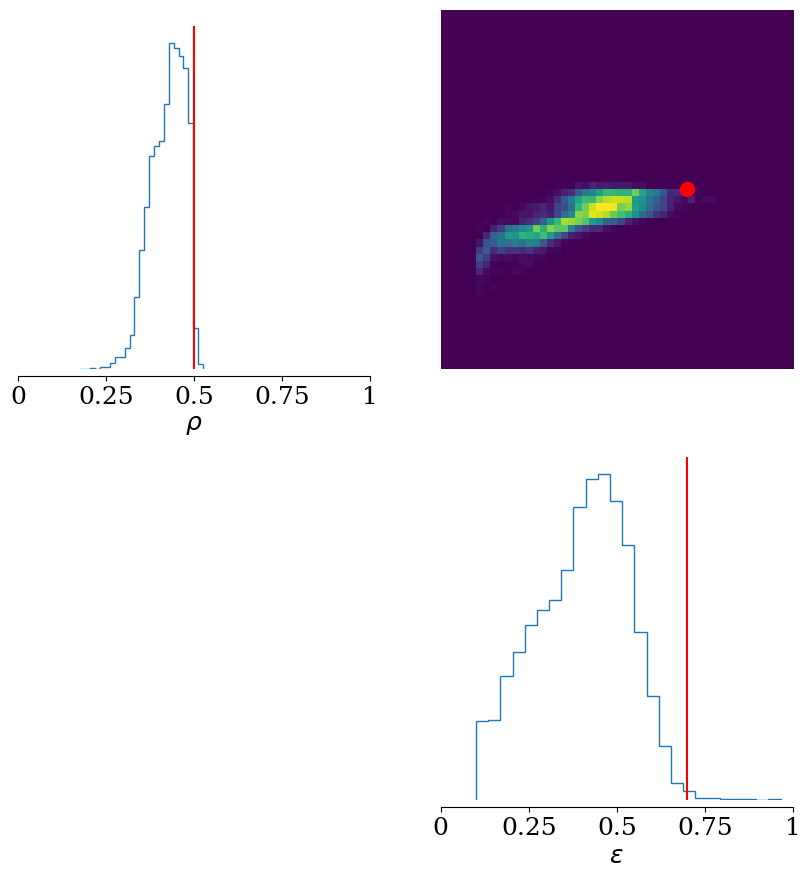

In [4]:
# maf -> new arch final v2
segregation = np.loadtxt("../../exp_dir/segregation/1716272490.8839006/samples.txt")
plt.rcParams.update({'font.size':18}) # something about latex font
_ = analysis.pairplot(segregation, limits=[[0,1], [0, 1]], points=[np.array([0.5, 0.7])],
                      points_colors='r', labels=[r"$\rho$", r"$\epsilon$", r"$\lambda$", r"$\alpha$"],
                      hist_diag={"alpha": 1.0, "bins": 25, "density": False, "histtype": "step"})


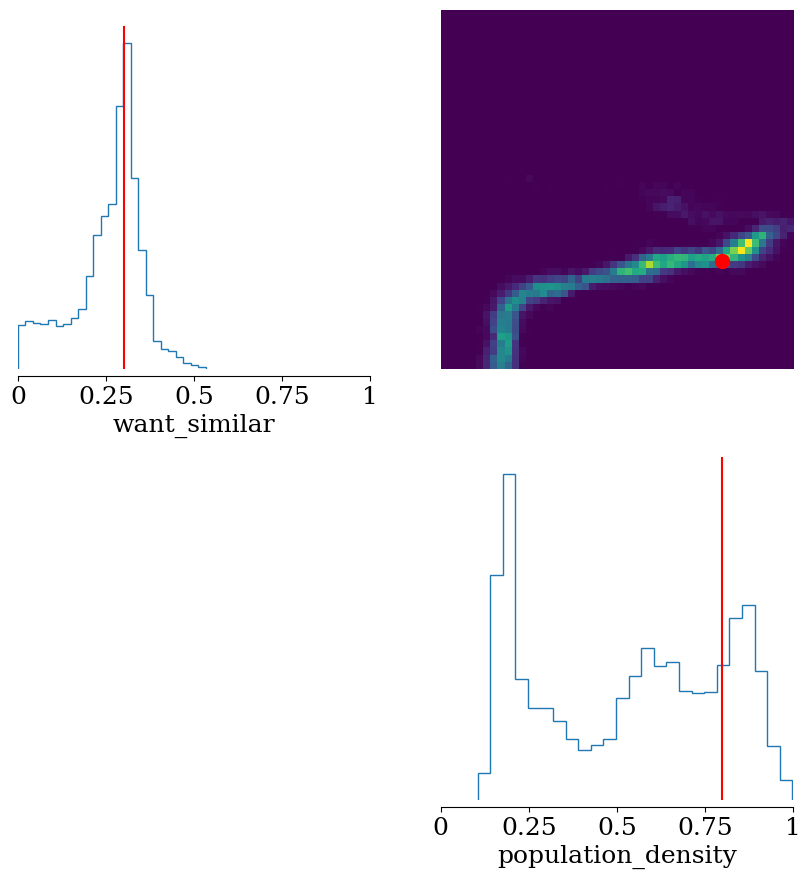

In [17]:
# maf -> new arch final v3
segregation = np.loadtxt("../../exp_dir/segregation/1716363959.585018/samples.txt")
plt.rcParams.update({'font.size':18}) # something about latex font
_ = analysis.pairplot(segregation, limits=[[0,1], [0, 1]], points=[np.array([0.3, 0.8])],
                      points_colors='r', labels=[r"want_similar", r"population_density"],
                      hist_diag={"alpha": 1.0, "bins": 25, "density": False, "histtype": "step"})


In [26]:
from sbi4abm.utils import io

segregationf = io.load_task('segregation')

file_name = "1716363959.585018"
with open(f"../../exp_dir/segregation/{file_name}/posteriors.pkl", 'rb') as file:
    posterior = pickle.load(file)
    posterior = posterior[0]

x = torch.tensor([0.1])
print(x.shape)

posterior_samples = posterior.sample((1000,), x=x)

torch.Size([1])


Drawing 1000 posterior samples: 9768it [00:00, 55795.87it/s]            


In [27]:
# Compute the mean of the samples
mean_estimate = posterior_samples.mean(dim=0)
print(f"Mean estimate: {mean_estimate}")

Mean estimate: tensor([0.8217, 0.1691])


In [28]:
y_star = segregationf[0](mean_estimate)
y_star = torch.tensor([y_star[0][-1]])
print(y_star)
print(x)

THETAs:  {'steps': 100, 'want_similar': 0.82170170545578, 'density': 0.1690812110900879}
Completed: 100 steps
Run time: 0:00:01.315966
Simulation finished
tensor([0.1700])
tensor([0.1000])


# Posterior Predictive Checks 

In [18]:
from sbi4abm.utils import io

segregationf = io.load_task('segregation')

In [19]:
idxs = np.random.randint(segregation.shape[0], size=1000)

In [20]:
print(segregation[idxs])

[[0.21807271 0.24751002]
 [0.21526831 0.26326999]
 [0.23417    0.40453517]
 ...
 [0.37087277 0.86906421]
 [0.1646653  0.22190699]
 [0.01432697 0.16817594]]


### Posterior Predictives

In [22]:
pps = []
for idx in idxs:
    data = segregationf[0](list(segregation[idx]))
    pps.append(data)

THETAs:  {'steps': 100, 'want_similar': 0.32227247953414917, 'density': 0.8589957356452942}
Completed: 54 steps
Run time: 0:00:02.384568
Simulation finished
THETAs:  {'steps': 100, 'want_similar': 0.12389468401670456, 'density': 0.14748388528823853}
Completed: 53 steps
Run time: 0:00:00.345397
Simulation finished
THETAs:  {'steps': 100, 'want_similar': 0.37114131450653076, 'density': 0.9207369089126587}
Completed: 59 steps
Run time: 0:00:02.609375
Simulation finished
THETAs:  {'steps': 100, 'want_similar': 0.28691166639328003, 'density': 0.6316083073616028}
Completed: 68 steps
Run time: 0:00:01.864074
Simulation finished
THETAs:  {'steps': 100, 'want_similar': 0.09509681165218353, 'density': 0.20972533524036407}
Completed: 36 steps
Run time: 0:00:00.341367
Simulation finished
THETAs:  {'steps': 100, 'want_similar': 0.2531665563583374, 'density': 0.35362911224365234}
Completed: 40 steps
Run time: 0:00:00.621722
Simulation finished
THETAs:  {'steps': 100, 'want_similar': 0.32566249370574

In [23]:
posterior_segregation = []
for pp in pps:
    if pp.ndim == 2:
        pp = pp[0]
    posterior_segregation.append(pp[-1])
    

### Prior Predictives

In [24]:
pps_ = []
for idx in idxs:
    data = segregationf[0](list(segregationf[1].sample().tolist()))
    pps_.append(data)

THETAs:  {'steps': 100, 'want_similar': 0.6143826842308044, 'density': 0.2404080033302307}
Completed: 100 steps
Run time: 0:00:01.841836
Simulation finished
THETAs:  {'steps': 100, 'want_similar': 0.31534117460250854, 'density': 0.16591282188892365}
Completed: 66 steps
Run time: 0:00:00.463912
Simulation finished
THETAs:  {'steps': 100, 'want_similar': 0.8904042840003967, 'density': 0.889224648475647}
Completed: 100 steps
Run time: 0:00:07.349796
Simulation finished
THETAs:  {'steps': 100, 'want_similar': 0.9427196979522705, 'density': 0.4531652629375458}
Completed: 100 steps
Run time: 0:00:03.633913
Simulation finished
THETAs:  {'steps': 100, 'want_similar': 0.7195858359336853, 'density': 0.9561255574226379}
Completed: 100 steps
Run time: 0:00:07.797754
Simulation finished
THETAs:  {'steps': 100, 'want_similar': 0.8042857050895691, 'density': 0.9424590468406677}
Completed: 100 steps
Run time: 0:00:07.703247
Simulation finished
THETAs:  {'steps': 100, 'want_similar': 0.5030250549316406

Completed: 100 steps
Run time: 0:00:05.176927
Simulation finished
THETAs:  {'steps': 100, 'want_similar': 0.025696277618408203, 'density': 0.7143933773040771}
Completed: 18 steps
Run time: 0:00:00.586776
Simulation finished
THETAs:  {'steps': 100, 'want_similar': 0.42629510164260864, 'density': 0.8549889922142029}
Completed: 100 steps
Run time: 0:00:04.511511
Simulation finished
THETAs:  {'steps': 100, 'want_similar': 0.2320045828819275, 'density': 0.5167596936225891}
Completed: 26 steps
Run time: 0:00:00.604434
Simulation finished
THETAs:  {'steps': 100, 'want_similar': 0.6525916457176208, 'density': 0.3507022559642792}
Completed: 100 steps
Run time: 0:00:02.728442
Simulation finished
THETAs:  {'steps': 100, 'want_similar': 0.10029333829879761, 'density': 0.4996740221977234}
Completed: 16 steps
Run time: 0:00:00.363235
Simulation finished
THETAs:  {'steps': 100, 'want_similar': 0.1482791304588318, 'density': 0.6198440194129944}
Completed: 19 steps
Run time: 0:00:00.513163
Simulation f

In [25]:
prior_segregation = []
for pp in pps_:
    if pp.ndim == 2:
        pp = pp[0]
    prior_segregation.append(pp[-1])
    

### Observation

In [26]:
observation_segregation = segregationf[2][-1]

### Plots

In [27]:
from matplotlib.lines import Line2D
import matplotlib.patches as patches

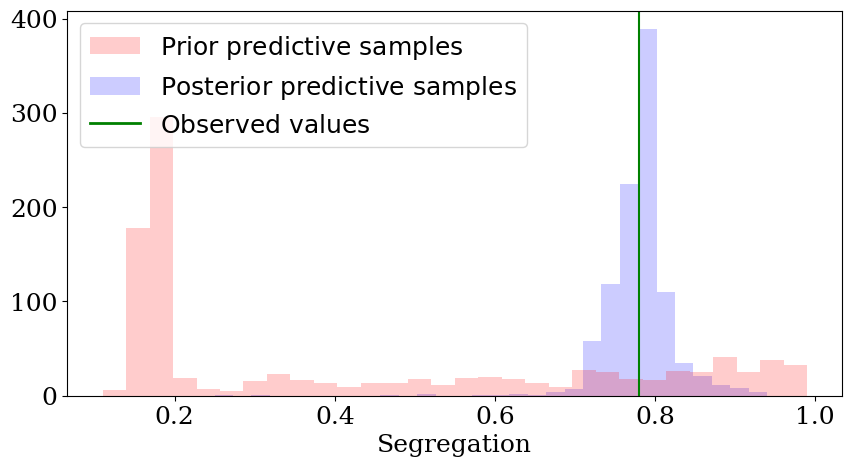

In [28]:
plt.figure(figsize=(10, 5))
plt.hist(posterior_segregation, bins=20, color='b', alpha=0.2)
plt.hist(prior_segregation, bins=20, color='r', alpha=0.2)
plt.axvline(observation_segregation, c='g')
plt.xlabel(r"Segregation", fontsize=18)
# plt.legend([r"Observed value", r"Prior predictive samples", r"Posterior predictive samples"], fontsize=18)

handles = [patches.Rectangle((0,0),0,0,facecolor='r',
                             label=r"${\rm Prior}$ ${\rm predictive}$ ${\rm samples}$", alpha=0.2),
           patches.Rectangle((0,0),0,0,facecolor='b',
                             label=r"${\rm Posterior}$ ${\rm predictive}$ ${\rm samples}$", alpha=0.2),
           Line2D([0], [0], color='g', label=r"${\rm Observed}$ ${\rm values}$", lw=2, linestyle="-")]

plt.legend(handles=handles, fontsize=18)

# MAP

In [5]:
from sbi4abm.utils import io

segregationf = io.load_task('segregation')

file_name = "1716363959.585018"
with open(f"../../exp_dir/segregation/{file_name}/posteriors.pkl", 'rb') as file:
    posterior = pickle.load(file)
    posterior = posterior[0]

In [6]:
# Define the negative log-posterior function for minimization
def neg_log_posterior(theta, posterior, observed_data):
    theta = torch.tensor(theta).float()
    return -posterior.log_prob(theta, x=observed_data).item()

In [7]:
from scipy.optimize import minimize

# observed data
final = segregationf[2]
segregation_percentage = final[-1]
observation_segregation_percentage = torch.tensor([segregation_percentage])

initial_theta = segregationf[1].mean.numpy()
print(initial_theta)

# Optimize to find the MAP estimate
result = minimize(neg_log_posterior, initial_theta, args=(posterior, observation_segregation_percentage), method='L-BFGS-B')
map_estimate = result.x

print(f"MAP estimate: {map_estimate}")

[0.5  0.55]
MAP estimate: [0.5        0.55000001]


In [8]:
true_theta = torch.tensor(segregationf[3])
map_estimate = torch.tensor(map_estimate)
print(true_theta)
print(map_estimate)
loss = F.mse_loss(map_estimate, true_theta)
print(f"Loss between map theta and true theta: {loss.item()}")

tensor([0.3000, 0.8000], dtype=torch.float64)
tensor([0.5000, 0.5500], dtype=torch.float64)
Loss between map theta and true theta: 0.051249997019767846


In [9]:
y_star = segregationf[0](map_estimate.tolist())
y_star = torch.tensor([y_star[0][-1]])
print(y_star)
print(observation_segregation_percentage)

THETAs:  {'steps': 100, 'want_similar': 0.5, 'density': 0.550000011920929}
Completed: 100 steps
Run time: 0:00:02.893719
Simulation finished
tensor([0.9600])
tensor([0.7800], dtype=torch.float64)


In [10]:
import torch.nn.functional as F

def loss_function(simulated_output, observed_statistic):
    return F.mse_loss(simulated_output, observed_statistic)


# Compute the loss
loss = loss_function(y_star, observation_segregation_percentage)

print(f"Loss: {loss.item()}")

Loss: 0.03239999227523849


# Mean

In [11]:
# Generate samples from the posterior
num_samples = 1000  # Number of samples to draw
posterior_samples = posterior.sample((num_samples,), x=observation_segregation_percentage)

# Compute the mean of the samples
mean_estimate = posterior_samples.mean(dim=0)
print(f"Mean estimate: {mean_estimate}")

Drawing 1000 posterior samples: 10911it [00:00, 49974.34it/s]           

Mean estimate: tensor([0.2521, 0.5289])


In [14]:
# Compute statistics about the sampled theta values
posterior_samples_np = posterior_samples.numpy()
mean_theta = np.mean(posterior_samples_np, axis=0)
std_theta = np.std(posterior_samples_np, axis=0)
lower_bound_theta = np.percentile(posterior_samples_np, 2.5, axis=0)
upper_bound_theta = np.percentile(posterior_samples_np, 97.5, axis=0)

print(f"Mean of theta: {mean_theta}")
print(f"Standard deviation of theta: {std_theta}")
print(f"95% credible interval for theta: [{lower_bound_theta}, {upper_bound_theta}]")

Mean of theta: [0.2521358 0.5288535]
Standard deviation of theta: [0.09884051 0.26175487]
95% credible interval for theta: [[0.02669838 0.15329766], [0.42240392 0.92194285]]


In [15]:
true_theta = torch.tensor(segregationf[3])
mean_theta = torch.tensor(mean_theta)
print(true_theta)
print(mean_theta)
loss = F.mse_loss(mean_theta, true_theta) 
print(f"Loss between mean theta and true theta: {loss.item()}")

tensor([0.3000, 0.8000], dtype=torch.float64)
tensor([0.2521, 0.5289])
Loss between mean theta and true theta: 0.03790570891303575


In [16]:
y_star = segregationf[0](mean_estimate)
y_star = torch.tensor([y_star[0][-1]])
print(y_star)
print(observation_segregation_percentage)

THETAs:  {'steps': 100, 'want_similar': 0.25213557481765747, 'density': 0.5288533568382263}
Completed: 36 steps
Run time: 0:00:00.913541
Simulation finished
tensor([0.7800])
tensor([0.7800], dtype=torch.float64)


In [18]:
def loss_function(simulated_output, observed_statistic):
    return F.mse_loss(simulated_output, observed_statistic)


# Compute the loss
loss = loss_function(y_star, observation_segregation_percentage)

print(f"Loss: {loss.item()}")

Loss: 8.185452331202947e-16


# Sensitivity Analysis

In [5]:
file_name = "1716363959.585018"
with open(f"../../exp_dir/segregation/{file_name}/posteriors.pkl", 'rb') as file:
    posterior = pickle.load(file)
    posterior = posterior[0]

Drawing 200 posterior samples: 10095it [00:00, 33530.65it/s]          


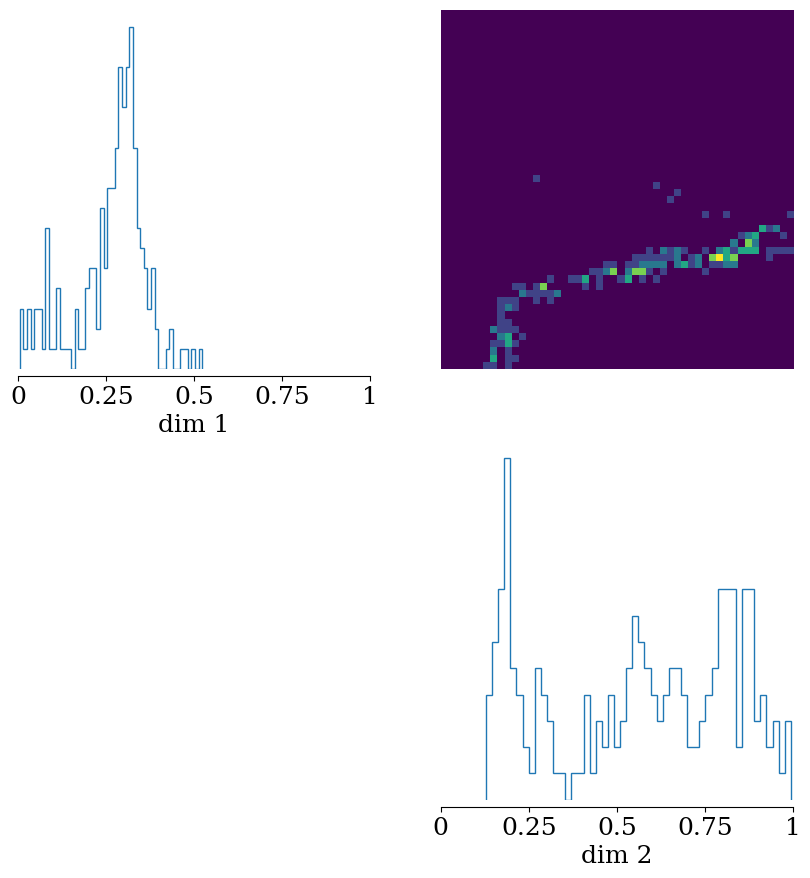

In [6]:
from sbi4abm.sbi.analysis import ActiveSubspace, pairplot

posterior_samples = posterior.sample((200,))
_ = pairplot(posterior_samples, limits=[[0,1], [0, 1]], figsize=(10, 10))

In [7]:
sensitivity = ActiveSubspace(posterior)
e_vals, e_vecs = sensitivity.find_directions(posterior_log_prob_as_property=True)

print("Eigenvalues: \n", e_vals, "\n")
print("Eigenvectors: \n", e_vecs)

Drawing 1000 posterior samples: 10880it [00:00, 35114.93it/s]           


Eigenvalues: 
 tensor([4.9000e-05, 3.3766e-04]) 

Eigenvectors: 
 tensor([[-0.1796, -0.9837],
        [-0.9837,  0.1796]])
